Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       120
           1       0.78      0.83      0.81        30

    accuracy                           0.92       150
   macro avg       0.87      0.89      0.88       150
weighted avg       0.92      0.92      0.92       150



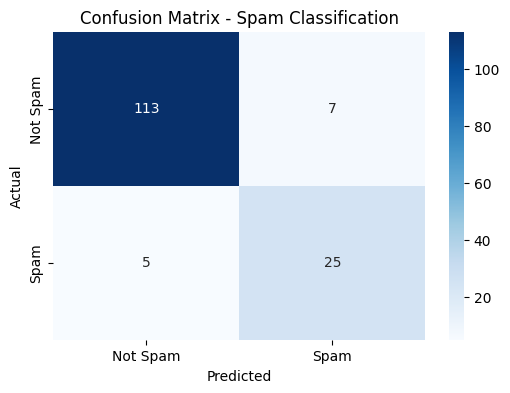

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 500

word_freq = np.random.rand(n_samples) * 100
msg_length = np.random.randint(20, 500, size=n_samples)

labels = ((word_freq > 50) & (msg_length < 200)).astype(int)

data = pd.DataFrame({"word_freq": word_freq, "msg_length": msg_length, "spam": labels})

X = data[['word_freq', 'msg_length']]
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Spam","Spam"], yticklabels=["Not Spam","Spam"])
plt.title("Confusion Matrix - Spam Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()